In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = 'usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager.findfont(font)

'usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io
from tqdm import tqdm    # tqdm
import random

In [3]:
import os
print(os.getcwd())

/workspace/userdisk/AIFFEL_quest_cr/AIFFEL_quest_rs/GoingDeeper/GD04


In [4]:
# ÌååÏùº Í≤ΩÎ°ú
path_to_file_ko = './korean-english-park.train.ko'
path_to_file_en = './korean-english-park.train.en'


# ÌååÏùº Ïó¥Ïñ¥ÏÑú ÎÇ¥Ïö© ÌôïÏù∏
with open(path_to_file_ko, 'r', encoding='utf-8') as f_ko, \
     open(path_to_file_en, 'r', encoding='utf-8') as f_en:
    
    korean_lines = f_ko.readlines()
    english_lines = f_en.readlines()
    
    # ÏòàÏãú Ï∂úÎ†•
    for i in range(5):
        print(f"KO: {korean_lines[i].strip()}")
        print(f"EN: {english_lines[i].strip()}")
        print("---")


KO: Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
EN: Much of personal computing is about "can you top this?"
---
KO: Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
EN: so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
---
KO: Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
EN: Like all optical mice, But it also doesn't need a desk.
---
KO: 79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏù¥Îì† Í∑∏ ÏõÄÏßÅÏûÑÏóêÎî∞Îùº Ïª§ÏÑúÏùò ÏõÄÏßÅÏûÑÏùÑ Ï°∞Ï†àÌïòÎäî ÌöåÏ†Ñ Ïö¥Îèô ÏÑºÏÑúÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§.
EN: uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
---
KO: Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú Îèå

In [5]:
print("Ï¥ù ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• Ïàò:", len(korean_lines))
print("Ï¥ù ÏòÅÏñ¥ Î¨∏Ïû• Ïàò:", len(english_lines))


Ï¥ù ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• Ïàò: 94123
Ï¥ù ÏòÅÏñ¥ Î¨∏Ïû• Ïàò: 94123


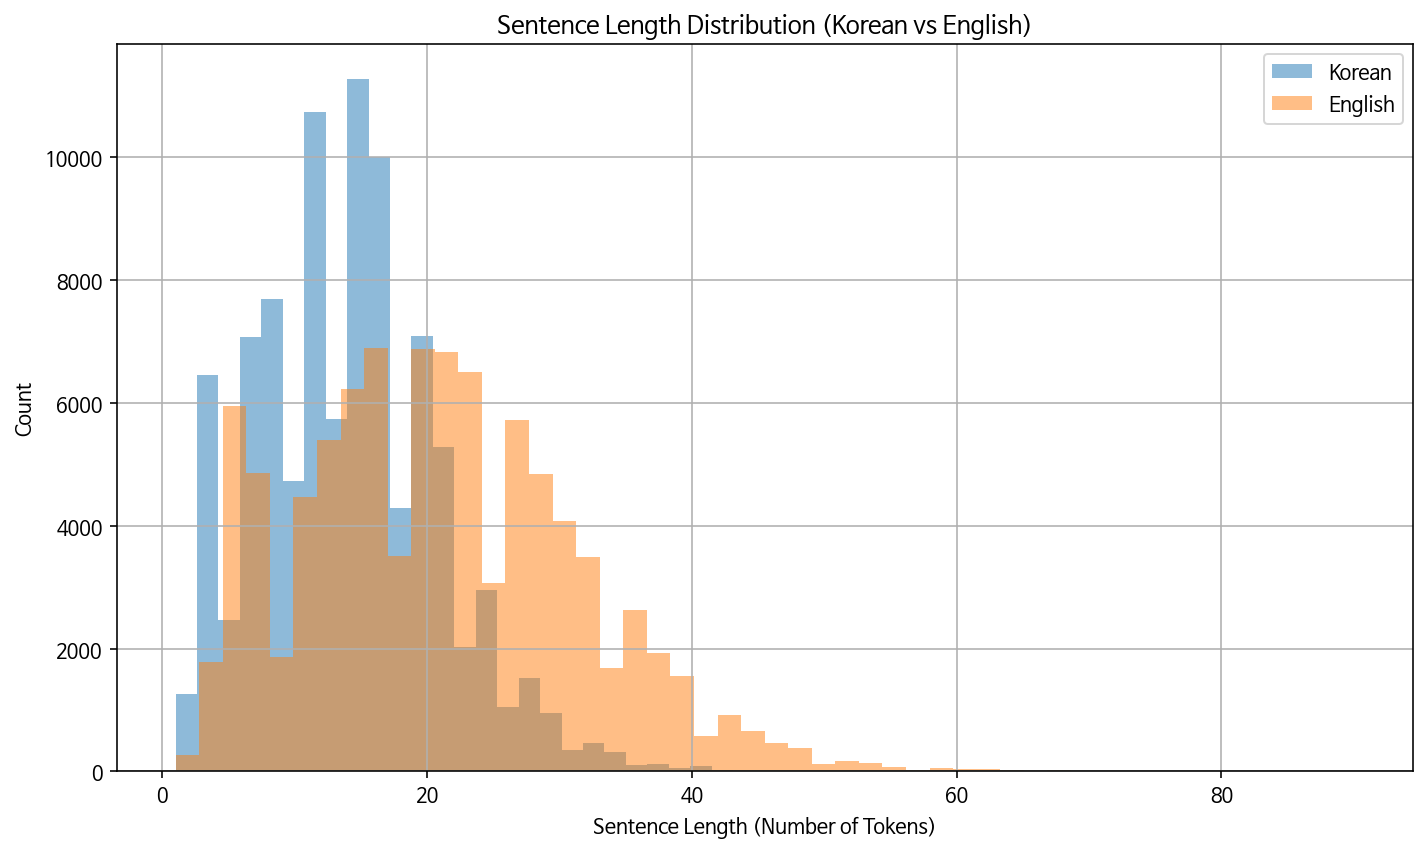

In [6]:
# Ï†ÑÏ≤¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨ Î≥¥Í∏∞
import matplotlib.pyplot as plt

kor_lengths = [len(s.split()) for s in korean_lines]
eng_lengths = [len(s.split()) for s in english_lines]

plt.figure(figsize=(10, 6))
plt.hist(kor_lengths, bins=50, alpha=0.5, label='Korean')
plt.hist(eng_lengths, bins=50, alpha=0.5, label='English')
plt.title("Sentence Length Distribution (Korean vs English)")
plt.xlabel("Sentence Length (Number of Tokens)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
- Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ (Îç∞Ïù¥ÌÑ∞Ïùò Î≥ëÎ†¨ ÏåçÏù¥ ÌùêÌä∏Îü¨ÏßÄÏßÄ ÏïäÍ≤å) cleaned_corpusÏóê Ï†ÄÏû•
- Íµ¨ÎëêÏ†ê, ÎåÄÏÜåÎ¨∏Ïûê, ÎùÑÏñ¥Ïì∞Í∏∞,ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑù
- preprocessing() Ï†ïÏùò
- <start>, <end> ÌÜ†ÌÅ∞ Ï∂îÍ∞Ä
- split() -> ÌÜ†ÌÅ∞Ìôî  ÌïúÍ∏Ä ÌÜ†ÌÅ∞ÌôîÎäî KoNLPy mecab ÏÇ¨Ïö©
- cleaned_corpusÏóêÏÑú ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 40 Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Î≥ÑÌïòÏó¨ eng_corpus, kor_corpus Íµ¨Ï∂ï

In [7]:
import re
from konlpy.tag import Mecab

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
mecab = Mecab()

# 1. Ï§ëÎ≥µ Ï†úÍ±∞ (Î≥ëÎ†¨Ïåç Îã®ÏúÑÎ°ú)
def remove_duplicates(korean_lines, english_lines):
    pairs = list(zip(korean_lines, english_lines))
    unique_pairs = list(set((ko.strip(), en.strip()) for ko, en in pairs))
    return unique_pairs

# 2. Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò
def preprocess_ko(text):
    text = re.sub(r'[a-zA-Z]', '', text)     # ÏòÅÏñ¥ Ï†úÍ±∞
    text = re.sub(r'[^\w\s]', '', text)  # Íµ¨ÎëêÏ†ê Ï†úÍ±∞
    tokens = mecab.morphs(text)          # ÌòïÌÉúÏÜå Î∂ÑÏÑù
    return ' '.join(tokens)

def preprocess_en(text):
    text = text.lower()  # ÏÜåÎ¨∏ÏûêÌôî
    text = re.sub(r'[^\w\s]', '', text)  # Íµ¨ÎëêÏ†ê Ï†úÍ±∞
    return ' '.join(text.strip().split())  # Î∂àÌïÑÏöîÌïú Í≥µÎ∞± Ï†úÍ±∞

# 3. Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö© Ìï®Ïàò
def preprocessing(korean, english):
    kor = preprocess_ko(korean)
    en = preprocess_en(english)
    en = '<start> ' + en + ' <end>'
    return kor, en

# 4. Ï†ÑÏ≤¥ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏
def build_clean_corpus(korean_lines, english_lines, max_len=40):
    cleaned_corpus = []
    pairs = remove_duplicates(korean_lines, english_lines)
    
    for ko, en in pairs:
        ko_proc, en_proc = preprocessing(ko, en)
        if len(ko_proc.split()) <= max_len and len(en_proc.split()) <= max_len:
            cleaned_corpus.append((ko_proc, en_proc))

    # ÌïúÍ∏Ä/ÏòÅÏñ¥ Îî∞Î°ú Î¶¨Ïä§Ìä∏ Î∂ÑÎ¶¨
    kor_corpus = [pair[0] for pair in cleaned_corpus]
    eng_corpus = [pair[1] for pair in cleaned_corpus]
    
    return kor_corpus, eng_corpus, cleaned_corpus


In [8]:
# ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Î¶¨Ïä§Ìä∏: korean_lines, english_lines
enc_corpus, dec_corpus, cleaned_corpus = build_clean_corpus(korean_lines, english_lines)

# Í≤∞Í≥º ÌôïÏù∏
for i in range(3):
    print("KO:", enc_corpus[i])
    print("EN:", dec_corpus[i])
    print("---")

print("‚úÖ Ï¥ù Î¨∏Ïû• Ïàò:", len(cleaned_corpus))


KO: Î∂ÅÌïú Ïùò Ìïµ ÌîÑÎ°úÍ∑∏Îû® Ïã†Í≥† Í∞Ä Ïû†Ï†ï Ï†Å Ïù∏ Ìï©Ïùò ÏàòÏ§Ä Ïóê ÎèÑÎã¨ Ìñà Îã§Í≥† ÎØ∏ Íµ≠Î¨¥Î∂Ä Í¥ÄÍ≥ÑÏûê Í∞Ä Î∞ùÌòî Îã§
EN: <start> washington cnn the united states is close to finalizing a deal with north korea over its nuclear program senior state department officials tell cnn <end>
---
KO: Í∑∏ Îäî Ïù¥ Îì§ Ïùò ÏÇ¨Îßù Í≥º Í¥ÄÎ†® Îêú Ïù∏Î¨º ÏùÑ ÏßïÍ≥Ñ Ï≤òÎ¶¨ Ìñà Îã§Í≥† Îßê Ìñà Îã§
EN: <start> we have punished the related personnel <end>
---
KO: Î∞©ÏÜ° ÎÇ¥Ïö© ÏóêÏÑú ÌîºÎç∏ Ïπ¥Ïä§Ìä∏Î°ú Ï†Ñ ÏùòÏû• ÏùÄ ÏÑú ÏÑú ÎåÄÌôî Î•º Ìïò Í≥† Ïûà Ïóà Îã§
EN: <start> during part of the video the elder castro is standing <end>
---
‚úÖ Ï¥ù Î¨∏Ïû• Ïàò: 66015


In [9]:
# # ‚úÖ ÏÉÅÏúÑ 30,000Í∞ú Î¨∏Ïû•Îßå ÏÇ¨Ïö©
# MAX_SAMPLES = 30000
# kor_corpus = kor_corpus[:MAX_SAMPLES]
# eng_corpus = eng_corpus[:MAX_SAMPLES]
# cleaned_corpus = cleaned_corpus[:MAX_SAMPLES]

# # Í≤∞Í≥º ÌôïÏù∏
# for i in range(3):
#     print("KO:", kor_corpus[i])
#     print("EN:", eng_corpus[i])
#     print("---")

# print("‚úÖ ÏÇ¨Ïö©Ìï† Î¨∏Ïû• Ïàò:", len(cleaned_corpus))

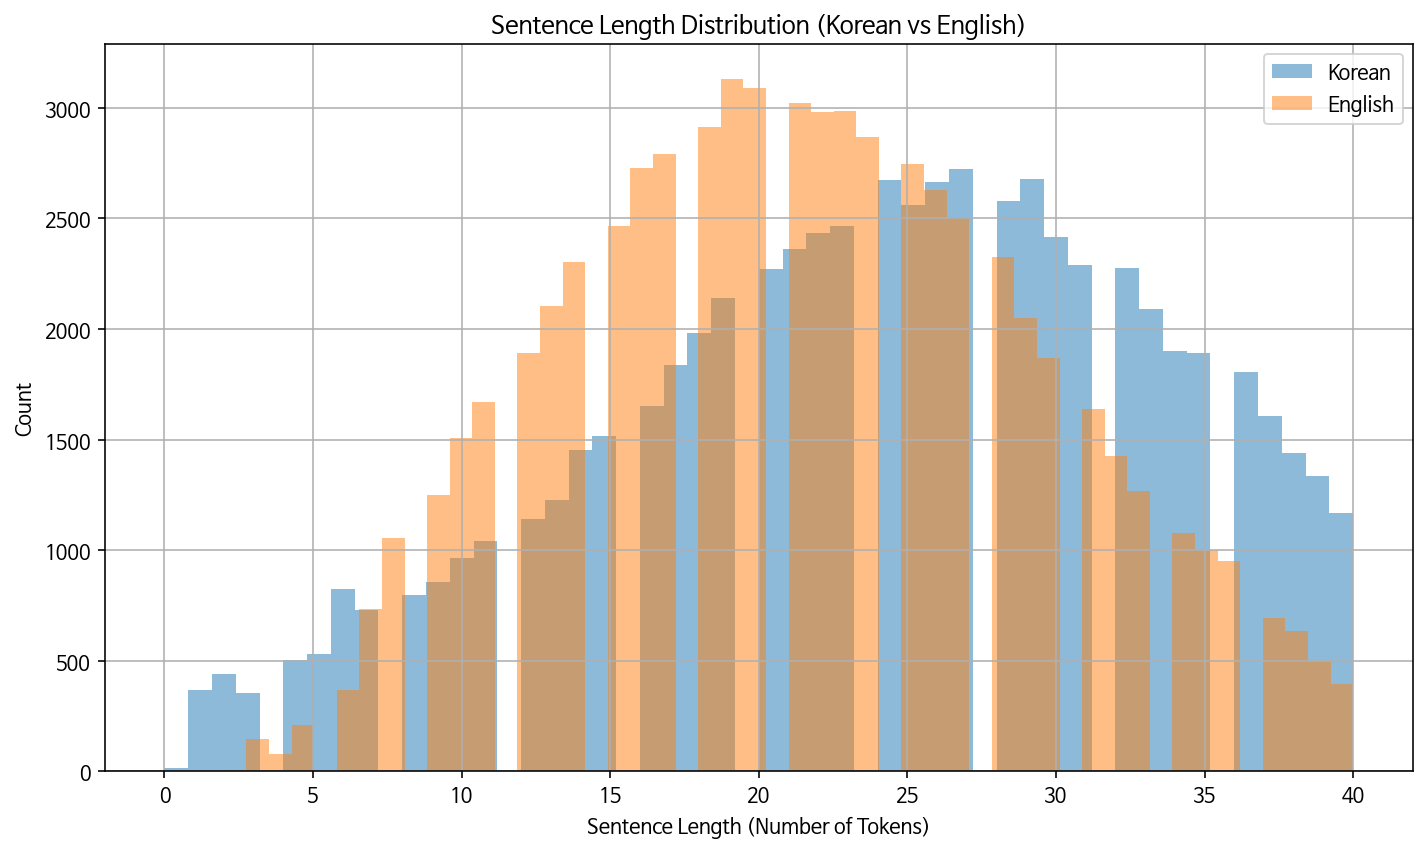

In [11]:
# Ï†ÑÏ≤¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨ Î≥¥Í∏∞
import matplotlib.pyplot as plt

kor_lengths = [len(s.split()) for s in enc_corpus]
eng_lengths = [len(s.split()) for s in dec_corpus]

plt.figure(figsize=(10, 6))
plt.hist(kor_lengths, bins=50, alpha=0.5, label='Korean')
plt.hist(eng_lengths, bins=50, alpha=0.5, label='English')
plt.title("Sentence Length Distribution (Korean vs English)")
plt.xlabel("Sentence Length (Number of Tokens)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî
- tokenize() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌïòÍ≥† tokenizer ÏñªÍ∏∞
- Ï†ÅÎãπÌïú Îã®Ïñ¥Ïàò?(ÏµúÏÜå 10,000Ïù¥ÏÉÅ, Ïã§ÌóòÏùÑ ÌÜµÌï¥ Ï†ÅÎãπÌïú Í∞í Ï∞æÍ∏∞)
- ÌõàÎ†®/Í≤ÄÏ¶ù ÎÇòÎàÑÏßÄ ÏïäÏùå

In [12]:
# enc_corpus = []
# dec_corpus = []

# num_examples = 30000

# for pair in cleaned_corpus[:num_examples]:
#     eng, spa = pair

#     enc_corpus.append(preprocessing(eng))
#     dec_corpus.append(preprocessing(spa, s_token=True, e_token=True))

# print("English:", enc_corpus[100])   # go away !
# print("Spanish:", dec_corpus[100])   # <start> salga de aqu ! <end>

In [13]:
# tokenize() Ìï®Ïàò Ï†ïÏùò
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer





In [15]:
# Îç∞Ïù¥ÌÑ∞Î•º ÌÖêÏÑúÎ°ú Î≥ÄÌôòÌïòÍ≥† tokenizer ÏñªÍ∏∞
# ÏòÅÏñ¥ corpus ÏòàÏãú: Ïù¥ÎØ∏ "<start> hello world <end>" Í∞ôÏùÄ ÌòïÏãù
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)



In [16]:
# Ï†ÅÎãπÌïú Îã®Ïñ¥ Ïàò Ï∞æÍ∏∞
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def vocab_coverage_analysis(corpus, thresholds=[10000, 15000, 20000, 25000, 30000]):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    total_words = sum(len(s.split()) for s in corpus)
    word_freq = tokenizer.word_counts  # OrderedDict

    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    cumulative = np.cumsum([freq for _, freq in sorted_freq])
    total_token_count = cumulative[-1]

    results = []

    for N in thresholds:
        top_tokens = sorted_freq[:N]
        token_sum = sum([freq for _, freq in top_tokens])
        coverage = token_sum / total_token_count * 100
        results.append((N, coverage))

    return results


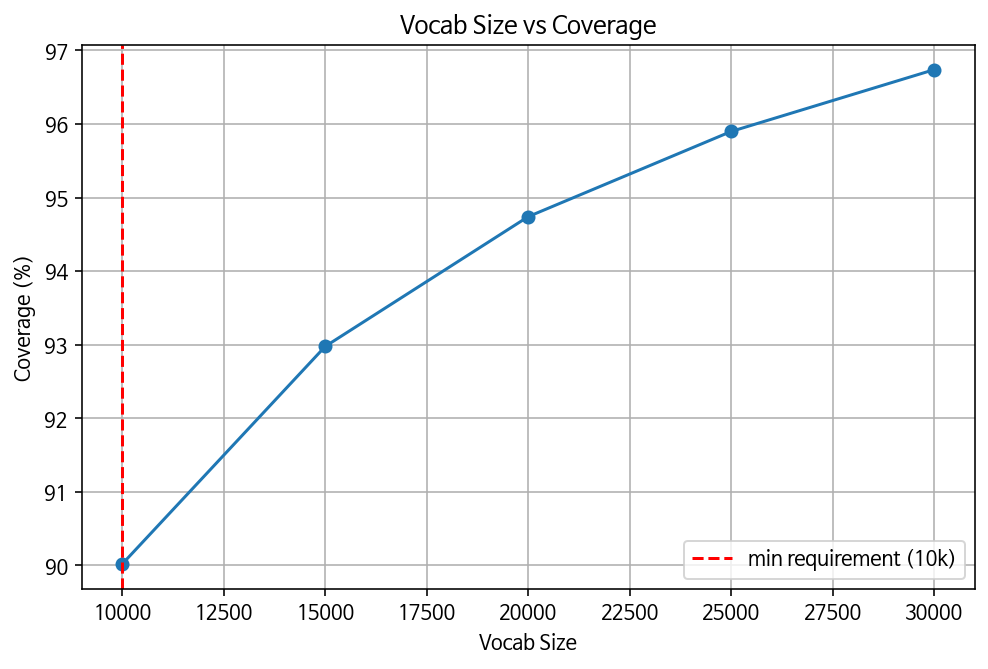

In [17]:
results = vocab_coverage_analysis(enc_corpus + dec_corpus,
                                  thresholds=[10000, 15000, 20000, 25000, 30000])

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
x = [r[0] for r in results]
y = [r[1] for r in results]

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o')
plt.title("Vocab Size vs Coverage")
plt.xlabel("Vocab Size")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.axvline(x=10000, color='r', linestyle='--', label='min requirement (10k)')
plt.legend()
plt.show()


- 95% Ïù¥ÏÉÅ Ïª§Î≤ÑÌïòÎäî Îã®Ïñ¥Ïàò : 20000~ 

In [19]:
VOCAB_size = 25000

def tokenize(corpus, vocab_size=None):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=vocab_size,
        filters='',
        oov_token='<unk>'  # ‚úÖ ÌïÑÏàòÎ°ú OOV Ï≤òÎ¶¨Ìï¥Ï£ºÎäî Í≤å Ï¢ãÏäµÎãàÎã§
    )
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer




In [21]:
VOCAB_SIZE = 25000

enc_tensor, enc_tokenizer = tokenize(enc_corpus, vocab_size=VOCAB_SIZE)
dec_tensor, dec_tokenizer = tokenize(dec_corpus, vocab_size=VOCAB_SIZE)


# Î™®Îç∏ ÏÖúÍ≥Ñ
- Attention Í∏∞Î∞ò Seq2seq Î™®Îç∏ ÏÑ§Í≥Ñ
- Dropout Ï∂îÍ∞Ä
- Embedding Size, Hidden size Ïã§Ìóò

In [22]:
# Bahdanau Attention
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn



In [23]:
# Encoder
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dropout_rate=0.3):
        super(Encoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)  # ‚úÖ Dropout Ï†ÅÏö©
        output, state = self.gru(x)
        return output, state


In [24]:
#Decoder
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, dropout_rate=0.3):
        super(Decoder, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        # Ïñ¥ÌÖêÏÖò
        self.attention = BahdanauAttention(dec_units)

    def call(self, x, hidden, enc_output):
        x = self.embedding(x)
        x = self.dropout(x)  # ‚úÖ Dropout Ï†ÅÏö©

        # attention context Í≥ÑÏÇ∞
        context, attn = self.attention(enc_output, hidden)
        context = tf.expand_dims(context, 1)
        x = tf.concat([context, x], axis=-1)

        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, context


In [25]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

EMBEDDING_DIM = 512
HIDDEN_SIZE = 1024
DROPOUT_RATE = 0.3

encoder = Encoder(vocab_size=SRC_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, enc_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)
decoder = Decoder(vocab_size=TGT_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, dec_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)

# ÏÉòÌîå ÏûÖÎ†•
sequence_len = 30
sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len), maxval=SRC_VOCAB_SIZE, dtype=tf.int32)

# Encoder
sample_output, sample_hidden = encoder(sample_enc)
print('‚úÖ Encoder Output:', sample_output.shape)
print('‚úÖ Encoder Hidden State:', sample_hidden.shape)

# Decoder
sample_input = tf.random.uniform((BATCH_SIZE, 1), maxval=TGT_VOCAB_SIZE, dtype=tf.int32)
sample_logits, h_dec, attn = decoder(sample_input, sample_hidden, sample_output)

print('‚úÖ Decoder Output:', sample_logits.shape)
print('‚úÖ Decoder Hidden State:', h_dec.shape)
print('‚úÖ Attention:', attn.shape if attn is not None else "None")


‚úÖ Encoder Output: (64, 30, 1024)
‚úÖ Encoder Hidden State: (64, 1024)
‚úÖ Decoder Output: (64, 49450)
‚úÖ Decoder Hidden State: (64, 1024)
‚úÖ Attention: (64, 1, 1024)


# ÌõàÎ†®ÌïòÍ∏∞
- Îß§ Ïä§ÌÖù ÏïÑÎûòÏùò ÏòàÎ¨∏Ïóê ÎåÄÌïú Î≤àÏó≠ÏùÑ ÏÉùÏÑ±
- Í∞ÄÏû• Ïûò Î≤àÏó≠Ìïú case Ï†úÏ∂ú
- attention map ÏãúÍ∞ÅÌôî
- ÏòàÎ¨∏  

    K1) Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.  
    
    K2) ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.  
    
    K3) Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.  
    
    K4) ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.  
    


In [26]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)



In [27]:
# train_step Íµ¨ÌòÑ
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out, h_dec = encoder(src)  # ‚úÖ Ï†ïÏãù Î∂ÑÎ¶¨

        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

In [28]:
# EPOCHS = 10
EXAMPLE_SENTENCES = [
    "Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.",
    "ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.",
    "Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.",
    "ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§."
]

In [29]:
def translate(sentence, encoder, decoder, src_tokenizer, tgt_tokenizer, max_len=40):
    sentence = preprocess_ko(sentence)
    sentence = '<start> ' + sentence + ' <end>'

    unk_idx = src_tokenizer.word_index.get('<unk>', 1)
    tokens = [src_tokenizer.word_index.get(w, unk_idx) for w in sentence.split()]
    tokens = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=max_len, padding='post')
    tokens = tf.convert_to_tensor(tokens)

    result = []

    enc_out, enc_hidden = encoder(tokens)
    h_dec = enc_hidden

    dec_input = tf.expand_dims([tgt_tokenizer.word_index.get('<start>', 2)], 0)

    for t in range(max_len):
        predictions, h_dec, _ = decoder(dec_input, h_dec, enc_out)
        predicted_id = tf.argmax(predictions[0]).numpy()
        predicted_word = tgt_tokenizer.index_word.get(predicted_id)

        # üîΩ ÏòàÏô∏ Ï≤òÎ¶¨
        if predicted_word is None:
            predicted_word = '<unk>'
        if predicted_word == '<end>':
            break

        result.append(predicted_word)
        dec_input = tf.expand_dims([predicted_id], 0)

    return ' '.join(result) if result else '[Empty Translation]'


In [30]:
# # üîß Ïã§Ìóò ÏÑ§Ï†ï
# DROPOUT_LIST = [0.1, 0.3]
# EMBED_LIST = [128, 256]
# HIDDEN_LIST = [256, 512]
# EPOCHS = 3


# # Ïã§Ìóò Ïã§Ìñâ
# for DROPOUT in DROPOUT_LIST:
#     for EMBED in EMBED_LIST:
#         for HIDDEN in HIDDEN_LIST:
#             print(f"\nüîß Experiment: EMBED={EMBED}, HIDDEN={HIDDEN}, DROPOUT={DROPOUT}")

#             encoder = Encoder(SRC_VOCAB_SIZE, EMBED, HIDDEN, DROPOUT)
#             decoder = Decoder(TGT_VOCAB_SIZE, EMBED, HIDDEN, DROPOUT)
#             optimizer = tf.keras.optimizers.Adam()

#             # Dummy call to initialize variables
#             dummy_input = tf.random.uniform((BATCH_SIZE, enc_tensor.shape[1]), maxval=SRC_VOCAB_SIZE, dtype=tf.int32)
#             dummy_target = tf.random.uniform((BATCH_SIZE, dec_tensor.shape[1]), maxval=TGT_VOCAB_SIZE, dtype=tf.int32)
#             enc_out, h_dec = encoder(dummy_input)
#             _ = decoder(tf.expand_dims(dummy_target[:, 0], 1), h_dec, enc_out)

#             # ‚õ≥ Î∞òÎìúÏãú train_step Ìò∏Ï∂ú Ï†ÑÏóê Î≥ÄÏàòÎì§Ïù¥ Î™®Îëê ÏÉùÏÑ±ÎêòÎèÑÎ°ù Î≥¥Ïû•
#             optimizer._create_hypers()
#             optimizer._create_slots([v for v in encoder.trainable_variables + decoder.trainable_variables])

#             for epoch in range(1, EPOCHS + 1):
#                 total_loss = 0
#                 idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
#                 random.shuffle(idx_list)

#                 for idx in tqdm(idx_list):
#                     batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
#                                             dec_tensor[idx:idx+BATCH_SIZE],
#                                             encoder, decoder, optimizer, dec_tokenizer)
#                     total_loss += batch_loss

#                 avg_loss = total_loss / len(idx_list)
#                 print(f"üåÄ Epoch {epoch}, Loss {avg_loss.numpy():.4f}")


- embedding 256
- hidden size 512
- dropout 0.3  

- EMBEDDING_DIM = 512
- HIDDEN_SIZE = 768
- DROPOUT_RATE = 0.3
- EPOCHS = 20

In [33]:
# ‚úÖ Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
EMBEDDING_DIM = 512
HIDDEN_SIZE = 768
DROPOUT_RATE = 0.3
EPOCHS = 10


# EMBEDDING_DIM = 512
# HIDDEN_SIZE = 1024
# DROPOUT_RATE = 0.3
# EPOCHS = 10

# ‚úÖ Î™®Îç∏, ÏòµÌã∞ÎßàÏù¥Ï†Ä Ï¥àÍ∏∞Ìôî
encoder = Encoder(vocab_size=SRC_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, enc_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)
decoder = Decoder(vocab_size=TGT_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, dec_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam()

# ‚úÖ dummy callÎ°ú Î™®Îç∏ Ï¥àÍ∏∞Ìôî (Graph ÎπåÎìúÏö©)
dummy_input = tf.random.uniform((BATCH_SIZE, enc_tensor.shape[1]), maxval=SRC_VOCAB_SIZE, dtype=tf.int32)
dummy_output = tf.random.uniform((BATCH_SIZE, dec_tensor.shape[1]), maxval=TGT_VOCAB_SIZE, dtype=tf.int32)
enc_out, h_dec = encoder(dummy_input)
_ = decoder(tf.expand_dims(dummy_output[:, 0], 1), h_dec, enc_out)

all_losses = []

for epoch in range(EPOCHS):
    total_loss = 0
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for batch_idx in t:
        batch_loss = train_step(
            enc_tensor[batch_idx:batch_idx + BATCH_SIZE],
            dec_tensor[batch_idx:batch_idx + BATCH_SIZE],
            encoder,
            decoder,
            optimizer,
            dec_tokenizer
        )
        total_loss += batch_loss
        t.set_description(f"Epoch {epoch + 1}")
        t.set_postfix(loss=total_loss.numpy() / (batch_idx // BATCH_SIZE + 1))

    epoch_loss = total_loss.numpy() / len(idx_list)
    all_losses.append(epoch_loss)

    print(f"\nüåÄ Epoch {epoch + 1}, Loss {epoch_loss:.4f}")



    
for i, sent in enumerate(EXAMPLE_SENTENCES, 1):
    translated = translate(sent, encoder, decoder, ko_tokenizer, en_tokenizer)
    print(f"K{i}) {sent} ‚Üí {translated}")

# ‚úÖ ÌïôÏäµ Loss ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.plot(range(1, len(all_losses)+1), all_losses, marker='o')
plt.title('Training Loss per Epoch\n(Embedding=512, hidden=768, Dropout=0.3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1:  12%|‚ñà‚ñè        | 126/1032 [01:42<12:15,  1.23it/s, loss=0.705]


KeyboardInterrupt: 

K1) Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§. ‚Üí the <unk>
K2) ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§. ‚Üí the <unk>
K3) Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§. ‚Üí the <unk>
K4) ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§. ‚Üí the <unk>


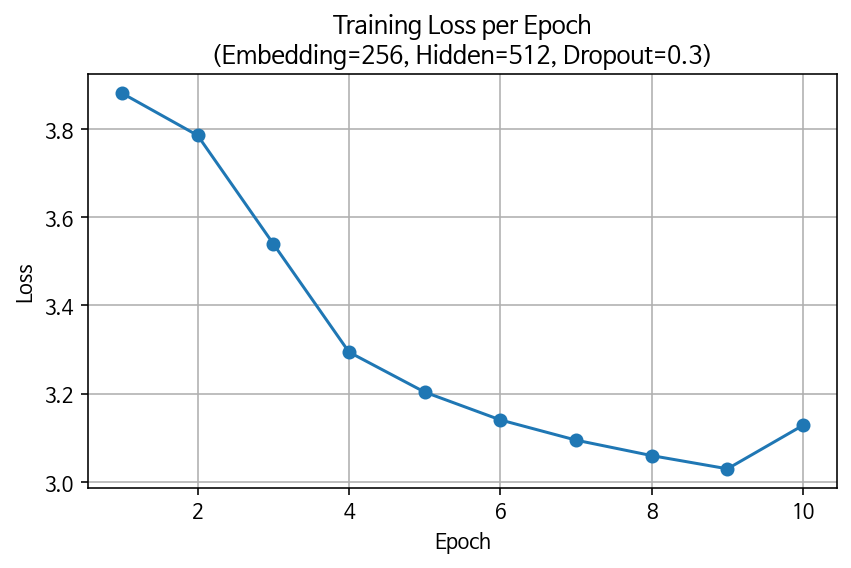

In [32]:
for i, sent in enumerate(EXAMPLE_SENTENCES, 1):
    translated = translate(sent, encoder, decoder, enc_tokenizer, dec_tokenizer)
    print(f"K{i}) {sent} ‚Üí {translated}")

# ‚úÖ ÌïôÏäµ Loss ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.plot(range(1, len(all_losses)+1), all_losses, marker='o')
plt.title('Training Loss per Epoch\n(Embedding=512, Hidden=768, Dropout=0.3)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

- lossÎäî Íæ∏Ï§ÄÌûà Îñ®Ïñ¥Ïßê
- ÏòàÎ¨∏ Î≤àÏó≠ Í≤∞Í≥ºÍ∞Ä the unk Í∞Ä Î∞òÎ≥µÎê®

# dec Ï¥àÍ∏∞ hidden state

In [51]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

print("Ïäù~")

Ïäù~


In [52]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dropout_rate=0.3):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True,
                                      return_state = True)
        
    def call(self, x):
        out = self.embedding(x)
        out, state = self.gru(out)
        
        return out, state

In [53]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, dropout_rate=0.3):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, state = self.gru(out, initial_state = h_dec)
        out = tf.reshape(out, (-1, out.shape[2]))
        x = self.fc(out)

        return x, state, attn

In [54]:
# train_step Íµ¨ÌòÑ
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out, h_dec = encoder(src)  # ‚úÖ Ï†ïÏãù Î∂ÑÎ¶¨

        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss


In [55]:
def translate(sentence, encoder, decoder, src_tokenizer, tgt_tokenizer, max_len=40):
    sentence = preprocess_ko(sentence)
    sentence = '<start> ' + sentence + ' <end>'

    unk_idx = src_tokenizer.word_index.get('<unk>', 1)
    tokens = [src_tokenizer.word_index.get(w, unk_idx) for w in sentence.split()]
    tokens = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=max_len, padding='post')
    tokens = tf.convert_to_tensor(tokens)

    result = []

    # ‚úÖ Ïù∏ÏΩîÎçî Ï∂úÎ†•Í≥º ÎßàÏßÄÎßâ ÏÉÅÌÉú Î∞òÌôò
    enc_out, enc_hidden = encoder(tokens)
    h_dec = enc_hidden  # ‚úÖ Decoder Ï¥àÍ∏∞ ÏÉÅÌÉú

    # ÎîîÏΩîÎçî Ï≤´ ÏûÖÎ†•ÏùÄ <start> ÌÜ†ÌÅ∞
    dec_input = tf.expand_dims([tgt_tokenizer.word_index.get('<start>', 3)], 0)

    for t in range(max_len):
        preds, h_dec, _ = decoder(dec_input, h_dec, enc_out)
        predicted_id = tf.argmax(preds[0]).numpy()
        predicted_word = tgt_tokenizer.index_word.get(predicted_id)

        # ‚úÖ ÏòàÏô∏ Ï≤òÎ¶¨
        if predicted_word is None:
            predicted_word = '<unk>'
        if predicted_word == '<end>':
            break
        if predicted_word == '<start>' and t > 0:  # Ï≤òÏùåÎßå ÌóàÏö©
            print(f"[{t+1}] Skipped <start>")
            continue

        print(f"[{t+1}] Predicted ID: {predicted_id} ‚Üí Token: {predicted_word}")

        result.append(predicted_word)
        dec_input = tf.expand_dims([predicted_id], 0)

    return ' '.join(result) if result else '[Empty Translation]'


In [56]:
EMBEDDING_DIM = 512
HIDDEN_SIZE = 1024
DROPOUT_RATE = 0.3
EPOCHS = 10


#‚úÖ Î™®Îç∏, ÏòµÌã∞ÎßàÏù¥Ï†Ä Ï¥àÍ∏∞Ìôî
encoder = Encoder(vocab_size=SRC_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, enc_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)
decoder = Decoder(vocab_size=TGT_VOCAB_SIZE, embedding_dim=EMBEDDING_DIM, dec_units=HIDDEN_SIZE, dropout_rate=DROPOUT_RATE)
optimizer = tf.keras.optimizers.Adam()

# ‚úÖ dummy callÎ°ú Î™®Îç∏ Ï¥àÍ∏∞Ìôî (Graph ÎπåÎìúÏö©)
dummy_input = tf.random.uniform((BATCH_SIZE, enc_tensor.shape[1]), maxval=SRC_VOCAB_SIZE, dtype=tf.int32)
dummy_output = tf.random.uniform((BATCH_SIZE, dec_tensor.shape[1]), maxval=TGT_VOCAB_SIZE, dtype=tf.int32)
enc_out, h_dec = encoder(dummy_input)
_ = decoder(tf.expand_dims(dummy_output[:, 0], 1), h_dec, enc_out)

all_losses = []

for epoch in range(EPOCHS):
    total_loss = 0
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for batch_idx in t:
        batch_loss = train_step(
            enc_tensor[batch_idx:batch_idx + BATCH_SIZE],
            dec_tensor[batch_idx:batch_idx + BATCH_SIZE],
            encoder,
            decoder,
            optimizer,
            dec_tokenizer
        )
        total_loss += batch_loss
        t.set_description(f"Epoch {epoch + 1}")
        t.set_postfix(loss=total_loss.numpy() / (batch_idx // BATCH_SIZE + 1))

    epoch_loss = total_loss.numpy() / len(idx_list)
    all_losses.append(epoch_loss)

    print(f"\nüåÄ Epoch {epoch + 1}, Loss {epoch_loss:.4f}")

# ‚úÖ ÏòàÎ¨∏ Î≤àÏó≠ Ï∂úÎ†•
for i, sent in enumerate(EXAMPLE_SENTENCES, 1):
    translated = translate(sent, encoder, decoder, enc_tokenizer, dec_tokenizer)
    print(f"K{i}) {sent} ‚Üí {translated}")


Epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:26<00:00,  1.01s/it, loss=8.26]  



üåÄ Epoch 1, Loss 3.4023


Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:34<00:00,  1.02s/it, loss=52.8]  



üåÄ Epoch 2, Loss 2.6086


Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:20<00:00,  1.01s/it, loss=2.49]



üåÄ Epoch 3, Loss 2.1727


Epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:13<00:00,  1.00s/it, loss=60.4]   



üåÄ Epoch 4, Loss 1.8154


Epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:09<00:00,  1.00it/s, loss=4.11]  



üåÄ Epoch 5, Loss 1.5216


Epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:16<00:00,  1.00s/it, loss=2.74]



üåÄ Epoch 6, Loss 1.2968


Epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:11<00:00,  1.00it/s, loss=6.44]



üåÄ Epoch 7, Loss 1.1176


Epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:08<00:00,  1.00it/s, loss=1.84] 



üåÄ Epoch 8, Loss 0.9718


Epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:12<00:00,  1.00s/it, loss=2.34] 



üåÄ Epoch 9, Loss 0.8514


Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1032/1032 [17:21<00:00,  1.01s/it, loss=1.34] 


üåÄ Epoch 10, Loss 0.7516


NameError: name 'ko_tokenizer' is not defined

In [57]:
# ‚úÖ ÏòàÎ¨∏ Î≤àÏó≠ Ï∂úÎ†•
for i, sent in enumerate(EXAMPLE_SENTENCES, 1):
    translated = translate(sent, encoder, decoder, enc_tokenizer, dec_tokenizer)
    print(f"K{i}) {sent} ‚Üí {translated}")

[1] Predicted ID: 125 ‚Üí Token: obama
[2] Predicted ID: 118 ‚Üí Token: may
[3] Predicted ID: 27 ‚Üí Token: be
[4] Predicted ID: 19122 ‚Üí Token: sizing
[5] Predicted ID: 76 ‚Üí Token: some
[6] Predicted ID: 6 ‚Üí Token: of
[7] Predicted ID: 2 ‚Üí Token: the
[8] Predicted ID: 52 ‚Üí Token: president
K1) Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§. ‚Üí obama may be sizing some of the president
[1] Predicted ID: 39 ‚Üí Token: they
[2] Predicted ID: 32 ‚Üí Token: will
[3] Predicted ID: 27 ‚Üí Token: be
[4] Predicted ID: 7273 ‚Üí Token: reluctant
[5] Predicted ID: 5 ‚Üí Token: to
[6] Predicted ID: 1501 ‚Üí Token: carry
[7] Predicted ID: 62 ‚Üí Token: out
[8] Predicted ID: 2 ‚Üí Token: the
[9] Predicted ID: 1504 ‚Üí Token: citys
[10] Predicted ID: 2358 ‚Üí Token: language
[11] Predicted ID: 1 ‚Üí Token: <unk>
K2) ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§. ‚Üí they will be reluctant to carry out the citys language <unk>
[1] Predicted ID: 2 ‚Üí Token: the
[2] Predicted ID: 3250 ‚Üí Token: coffee
[3] Predicted ID: 1

In [ ]:
# print(f"<start> token index in target tokenizer: {dec_tokenizer.word_index.get('<start>')}")
# print(f"<unk> token index in target tokenizer: {dec_tokenizer.word_index.get('<unk>')}")
# print("Decoder output example:")
# translated = translate("Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.", encoder, decoder, ko_tokenizer, en_tokenizer)
# print("‚Üí", translated)


In [ ]:
# print("\nüìå First 20 tokens in index_word:")
# for token, idx in list(dec_tokenizer.index_word.items())[:20]:
#     print(f"{token}: {idx}")

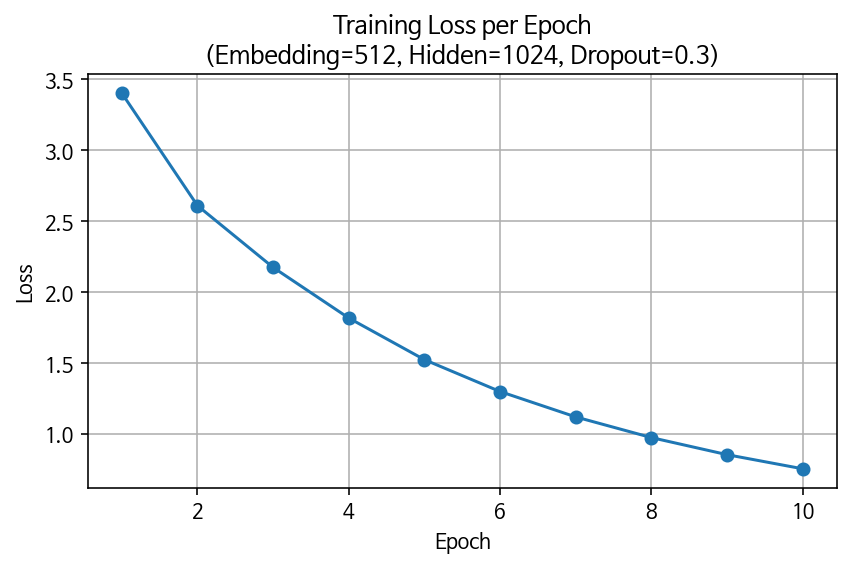

In [58]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(all_losses)+1), all_losses, marker='o')
plt.title(f'Training Loss per Epoch\n(Embedding={EMBEDDING_DIM}, Hidden={HIDDEN_SIZE}, Dropout={DROPOUT_RATE})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
def translate_with_attention(sentence, encoder, decoder, src_tokenizer, tgt_tokenizer, max_len=40):
    sentence_proc = preprocess_ko(sentence)
    sentence_proc = '<start> ' + sentence_proc + ' <end>'

    src_vocab = src_tokenizer.word_index
    tgt_vocab = tgt_tokenizer.word_index
    src_inv_vocab = src_tokenizer.index_word
    tgt_inv_vocab = tgt_tokenizer.index_word

    # ÏûÖÎ†• Î¨∏Ïû• ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
    tokens = [src_vocab.get(w, src_vocab.get('<unk>', 1)) for w in sentence_proc.strip().split()]
    tokens = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=max_len, padding='post')
    tokens = tf.convert_to_tensor(tokens)

    enc_out, enc_hidden = encoder(tokens)
    h_dec = enc_hidden

    dec_input = tf.expand_dims([tgt_vocab.get('<start>', 2)], 0)

    result = []
    attentions = []

    for t in range(max_len):
        preds, h_dec, attn_weights = decoder(dec_input, h_dec, enc_out)
        predicted_id = tf.argmax(preds[0]).numpy()
        predicted_word = tgt_inv_vocab.get(predicted_id, '<unk>')

        attentions.append(attn_weights[0].numpy().squeeze())  # shape: [enc_len]

        if predicted_word == '<end>':
            break
        if predicted_word == '<start>' and t > 0:
            continue

        result.append(predicted_word)
        dec_input = tf.expand_dims([predicted_id], 0)

    input_tokens = [src_inv_vocab.get(i, '<pad>') for i in tokens[0].numpy()]
    return result, attentions, input_tokens


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_attention(attention_weights, input_tokens, predicted_tokens):
    attention_matrix = np.array(attention_weights)  # shape: [dec_len, enc_len]

    plt.figure(figsize=(len(input_tokens) * 0.6, len(predicted_tokens) * 0.6))
    sns.heatmap(attention_matrix,
                xticklabels=input_tokens,
                yticklabels=predicted_tokens,
                cmap='viridis',
                linewidths=0.5,
                cbar=True)

    plt.xlabel('Input Tokens (Korean)')
    plt.ylabel('Output Tokens (English)')
    plt.xticks(rotation=45)
    plt.title('Attention Map')
    plt.tight_layout()
    plt.show()


K1) Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§. ‚Üí obama may be sizing some of the president


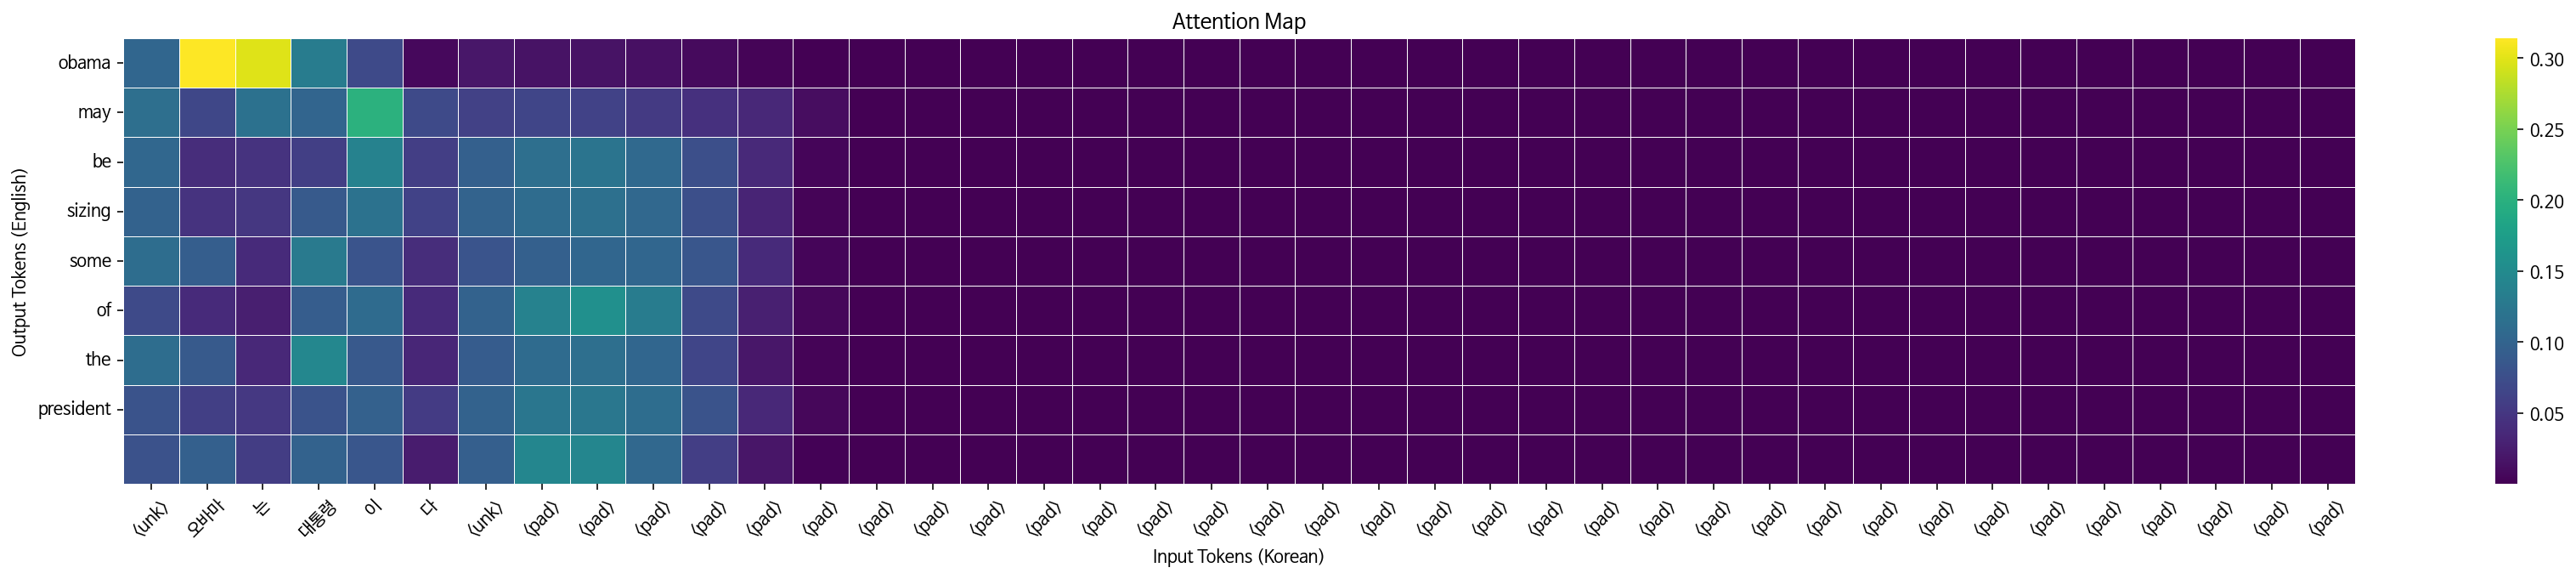

K2) ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§. ‚Üí they will be reluctant to carry out the citys language <unk>


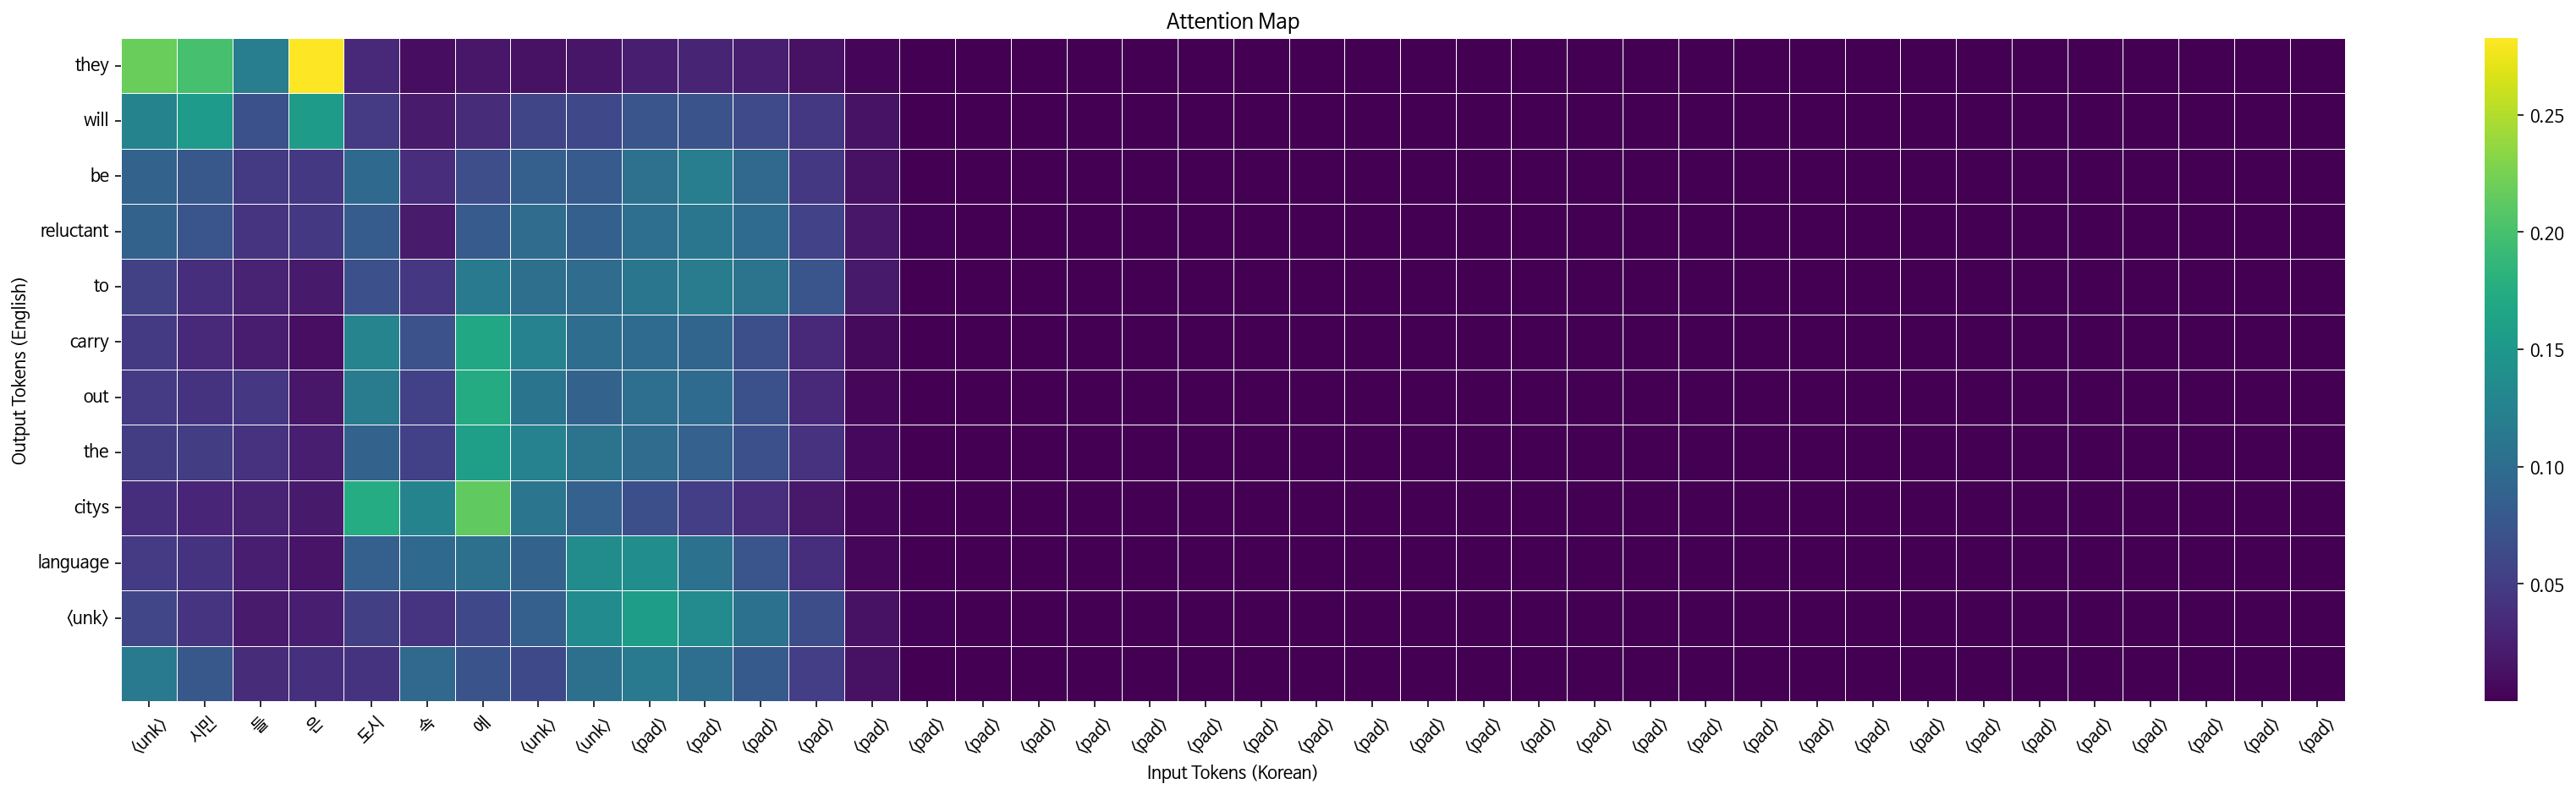

K3) Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§. ‚Üí the coffee cost will not be drinking


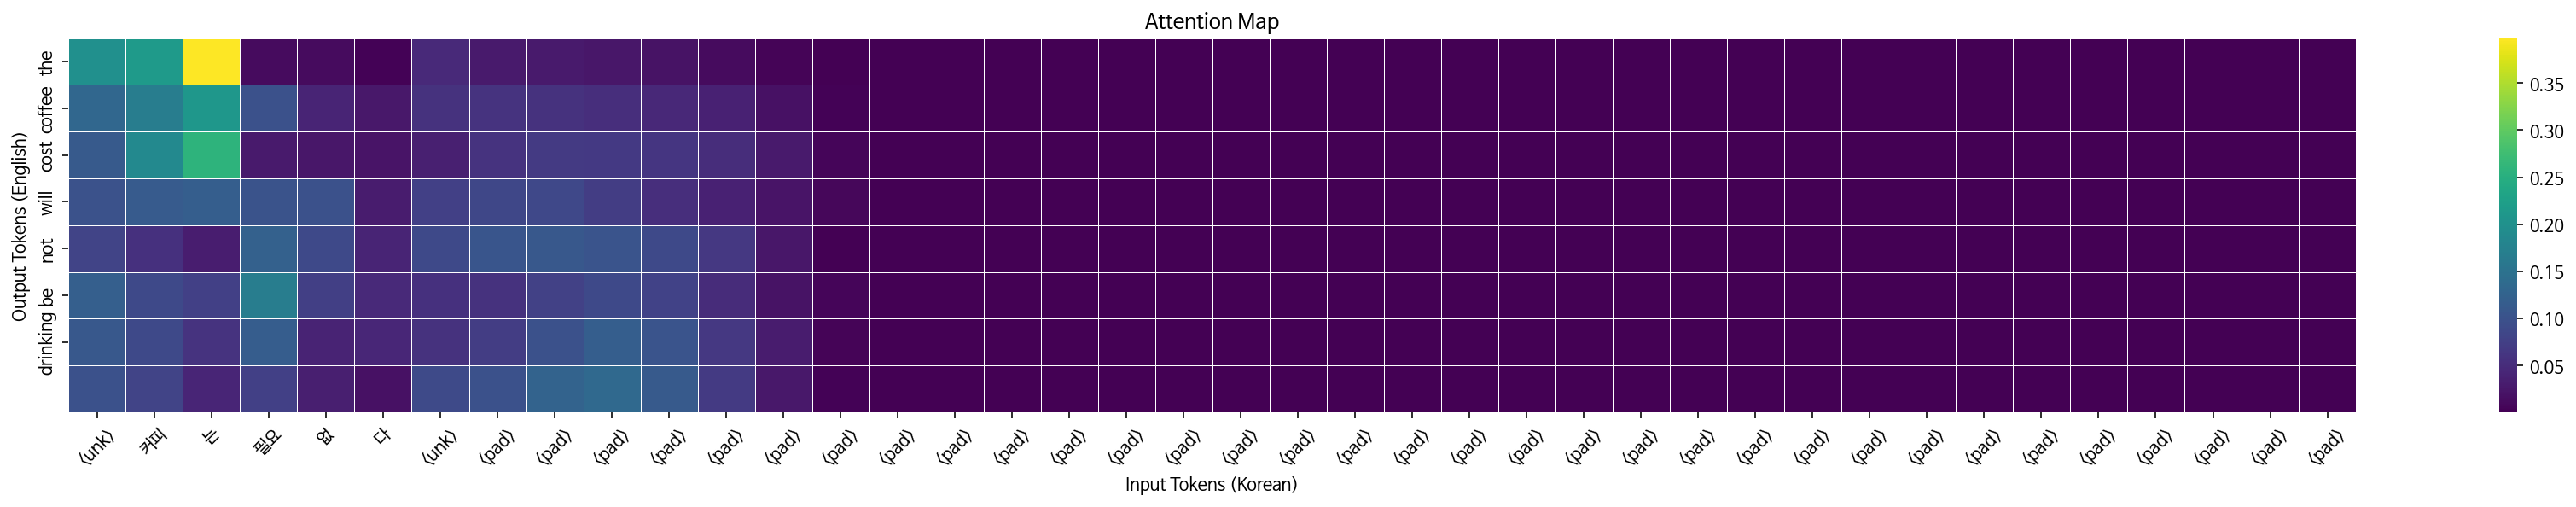

K4) ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§. ‚Üí seven killed the three people


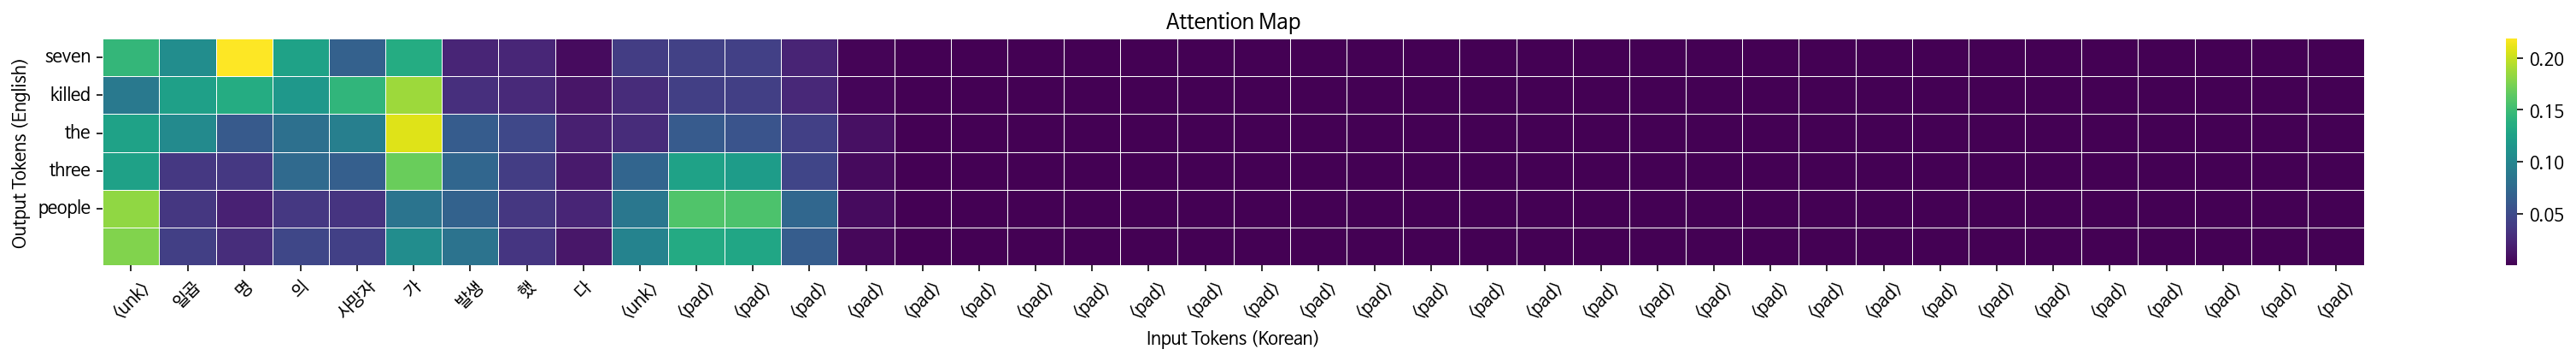

In [72]:
for i, sent in enumerate(EXAMPLE_SENTENCES, 1):
    translated, attn_weights, input_tokens = translate_with_attention(
        sent, encoder, decoder, enc_tokenizer, dec_tokenizer
    )
    print(f"K{i}) {sent} ‚Üí {' '.join(translated)}")
    plot_attention(attn_weights, input_tokens, translated)


- unk ÌÜ†ÌÅ∞Ïù¥ Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÍ∞Ä ÎÇòÌÉÄÎÇ®
- Î≤àÏó≠Ïù¥ ÏûêÏó∞Ïä§ÎüΩÏßÄ ÏïäÍ≥† Î¨∏Î≤ïÏ†ÅÏúºÎ°ú Î∂ÄÏûêÏó∞Ïä§Îü¨Ïö¥ Î≤àÏó≠ÏùÑ ÌïòÍ≥† ÏûàÎã§. 
- Î∂àÌïÑÏöîÌïú Îã®Ïñ¥ ÏÑ†ÌÉù : sizing, reluctant, carry out  Í∞ôÏùÄ Î∂ÄÏûêÏó∞Ïä§Îü¨Ïö¥ Îã®Ïñ¥Îì§ Îì±Ïû•
- Ïñ¥ÌÖêÏÖòÎßµÏùÑ Î≥¥ÏïòÏùÑ Îïå Î∂àÌïÑÏöîÌïú Î∂ÄÎ∂ÑÏóê Ï£ºÏùòÍ∞Ä Í∞ÄÎäî Í≤ΩÌñ•Ïù¥ Î≥¥ÏûÑ


- vocab_sizeÎ•º ÎäòÎ†§ÏÑú Î™®Îç∏Ïù¥ Îçî ÎßéÏùÄ Îã®Ïñ¥Î•º ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù ÌïòÏó¨ unk ÌÜ†ÌÅ∞Ïù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÎèÑÎ°ù Ìï† Ïàò ÏûàÏùå. 

# ÌöåÍ≥†
- Ïñ¥ÌÖêÏÖòÎßµÏùÑ ÏãúÍ∞ÅÌôî ÌïòÏó¨ ÎîîÏΩîÎçîÍ∞Ä Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏóê ÏßëÏ§ëÌïòÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§. 
- Î™®Îç∏ ÌïôÏäµÏù¥ Ïûò ÎêòÏßÄ ÏïäÏïòÏóàÎäîÎç∞ ÎîîÏΩîÎçîÏùò Ï¥àÍ∏∞ state Í∞íÏùÑ ÎÑòÍ≤®Ï£ºÎèÑÎ°ù ÏàòÏ†ïÌïòÎãà ÌïôÏäµÏù¥ Ïûò Ïù¥Î£®Ïñ¥Ï°åÎã§. 
- learning rate, hiddensize, embedding size, batch size, epochs Î•º ÏµúÏ†ÅÌôîÌïòÏó¨ Î™®Îç∏Ïù¥ Í≥ºÏ†ÅÌï©ÎêòÏßÄ ÏïäÎèÑÎ°ù Í∞úÏÑ†Ìï† Ïàò ÏûàÍ≤†Ïùå. 